In [1]:
import pandas as pd
data = pd.read_csv('patients.csv',sep=",",error_bad_lines=False)

# Remove the Errors

## Select age is bigger than 0

In [2]:
data = data[data['age'] > 0]

In [3]:
data.head(10)

,patient_id,cancer_type,age,height(in),primary_site,sex,medication
0,5384,blood,44,14,Hodgkin Lymphoma,NaN,Dabrafenib
1,6599,blood,77,12,Hodgkin Lymphoma,NaN,hydrocodone
2,7979,brain,64,42,Brain Tumor,female,oxycodone
3,3498,colon,57,10,colorectal cancer,NaN,Bevacizumb
4,3395,cervix,20,1,cervical cancer,female,Amifostine
5,2626,melanoma,76,55,Skin of scalp and neck,female,oxycodone
6,4562,cervix,32,65,cervical cancer,male,Daratumumab
7,2382,colon,73,69,colorectal cancer,female,Bevacizumb
8,4368,kidney,98,64,kidney cancer,male,Dasatinib
9,9985,blood,83,48,Hodgkin Lymphoma,NaN,Dasatinib


In [4]:
set(data['cancer_type'])

{'armpit',
 'blood',
 'bone',
 'brain',
 'breast',
 'buttock',
 'cervix',
 'colon',
 'feet',
 'heart',
 'hypopharyngeal cancer',
 'kidney',
 'liver',
 'lung',
 'melanoma',
 'ovary',
 'prostate',
 'teeth',
 'thyroid',
 'tongue'}

In [5]:
# delete ovary with male
index2 = data[(data['sex'] == 'male') & (data['cancer_type'] == 'ovary')].index
data.drop(index2 , inplace=True)

In [6]:
index2

Int64Index([   75,    90,    92,   127,   143,   169,   217,   227,   242,
              292,
            ...
             9708,  9713,  9756,  9758,  9777,  9907,  9960,  9963, 10055,
            10081],
           dtype='int64', length=260)

In [7]:
# delete cervix to with male
index3 = data[(data['sex'] == 'male') & (data['cancer_type'] == 'cervix')].index

In [8]:
index3

Int64Index([   6,   35,  154,  182,  245,  263,  277,  294,  308,  330,
            ...
            9486, 9499, 9514, 9531, 9586, 9588, 9619, 9863, 9879, 9919],
           dtype='int64', length=249)

In [9]:
data.drop(index3, inplace = True)

In [10]:
data.shape

(9493, 7)

In [11]:
# drop prostate with female
index4 = data[(data['sex'] == 'female') & (data['cancer_type'] == 'prostate')].index

In [12]:
data.drop(index4,inplace = True)

In [13]:
data.shape

(9240, 7)

In [14]:
# breast with male

# data['sex'] == 'male'&& data['cancer_type'] == 'breast'
index_male_breast = data[(data['sex'] == 'male') & (data['cancer_type'] == 'breast')].index
print(len(index_male_breast))

index_female_breast = data[(data['sex'] == 'female') & (data['cancer_type'] == 'breast')].index
print(len(index_female_breast))

247
251


Well, the data has some bias since we know that female has higher risk to have breast cancers, but we can see from data that amount of patiene from two groups has the same amount that has breast cancers. 

In [15]:
height_1 = data[data['age'] < 10]['height(in)']
d1 = data[(data['age'] < 10) & ( data['height(in)'] > (height_1.mean()-height_1.std()) ) &
         (data['height(in)'] < (height_1.mean()+height_1.std()))]

height_1.mean(),height_1.std()

(42.46559633027523, 23.769293158042373)

In [16]:
d1.head()

,patient_id,cancer_type,age,height(in),primary_site,sex,medication
14,2444,breast,8,66,"Breast, NOS",male,Dacogen
33,9518,brain,6,36,Brain Tumor,NaN,codeine
36,2711,liver,9,56,Hepatocellular carcinoma,male,Lenvatinib
48,8055,blood,8,58,Hodgkin Lymphoma,female,Daratumumab
63,4725,lung,2,43,Non Small Cell Lung Cancer,NaN,Lorlatinb


In [17]:
height_2 = data[(data['age'] >= 10) & (data['age'] < 20)]['height(in)']
d2 = data[(data['age'] >= 10) & (data['age'] < 20) &
          ( data['height(in)'] > (height_2.mean()-height_2.std()) ) &
         (data['height(in)'] < (height_2.mean()+height_2.std()))]
height_2.mean(),height_2.std()

(41.16735966735967, 24.12950782465526)

In [18]:
height_3 = data[(data['age'] >= 20) & (data['age'] < 60)]['height(in)']

d3 = data[(data['age'] >= 20) & (data['age'] < 60) &
          ( data['height(in)'] > (height_3.mean()-height_3.std()) ) &
         (data['height(in)'] < (height_3.mean()+height_3.std()))]

d3.head()

,patient_id,cancer_type,age,height(in),primary_site,sex,medication
10,6116,thyroid,49,60,Thyroid gland,male,Dabrafenib
17,3664,lung,26,42,Non Small Cell Lung Cancer,male,Lorlatinb
25,8444,cervix,45,35,cervical cancer,female,Dabrafenib
29,7130,brain,41,44,Brain Tumor,NaN,codeine
31,2951,blood,24,28,Hodgkin Lymphoma,female,Acetaminophen


In [19]:
height_3.mean(),height_3.std()

(42.95544416597048, 24.1218868187257)

We can see that the mean is problematic when we have the sample age between 20 and 60, the sample is bias

In [20]:
height_4 = data[(data['age'] >= 60)]['height(in)']

d4 = data[(data['age'] >= 60) &
          ( data['height(in)'] > (height_4.mean()-height_4.std()) ) &
         (data['height(in)'] < (height_4.mean()+height_4.std()))]

d4.head()

,patient_id,cancer_type,age,height(in),primary_site,sex,medication
2,7979,brain,64,42,Brain Tumor,female,oxycodone
5,2626,melanoma,76,55,Skin of scalp and neck,female,oxycodone
8,4368,kidney,98,64,kidney cancer,male,Dasatinib
9,9985,blood,83,48,Hodgkin Lymphoma,NaN,Dasatinib
11,3204,prostate,64,63,prostate cancer,male,Dacarbazine


In [21]:
height_4.mean(),height_4.std()

(41.516120576671035, 24.16262394821937)

We also can see that the average height is still around 41

In [22]:
d=pd.concat([d1,d2,d3,d4])

In [23]:
d.shape

(5398, 7)

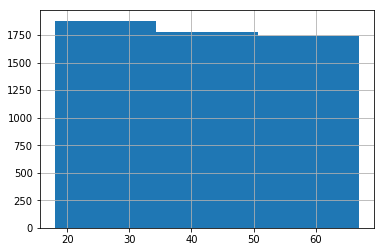

In [66]:
hist = d['height(in)'].hist(bins=3)

# Construct train and test set

In [40]:
# convert to catagorical of sex
df_sex = pd.get_dummies(d['sex'])

In [41]:
df_medication = pd.get_dummies(d['medication'])

In [42]:
df_age = d['age']

In [43]:
df_height = d['height(in)']

# Predict the lung cancer

In [54]:
df_y = (d['cancer_type'] == 'blood')

In [55]:
df_X = pd.concat([df_sex, df_medication, df_age, df_height],axis = 1)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
...     df_X, df_y, test_size=0.33, random_state=42)

# Using Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [59]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
y_score = classifier.predict(X_test)

In [61]:
from sklearn import metrics

In [62]:
fpr, tpr,_ = metrics.roc_curve(y_test,y_score)

In [63]:
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.4996691558748464


We can observes that the data is overfitting, if we use the medication as the variable, we can have good predictions on the cancer type

In [38]:
df_X.shape

(5398, 36)